In [1]:
import numpy as np
import pandas as pd
from math import *
from scipy.special import factorial, gammaln
import matplotlib.pyplot as plot
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.precision", 16)

## Problem 1

Explore how Floating point arithmetic produce different values for the following functions:

 
$f_1 = \frac{\sqrt{4 +x} - 2}{x} $

$f_2= \frac{1}{ \sqrt{4 +x} + 2}$


In [2]:
f1 = lambda x: (sqrt(4+x)-2)/x
f2 = lambda x: 1/(sqrt(4+x)+ 2)

In [3]:
res1 = []
res2 = []
domain = []

for i in range(1, 15):
    x = pow(10, -i)
    
    domain.append(x)
    res1.append(f1(x))
    res2.append(f2(x))

In [4]:
data = {"f1": res1, "f2": res2}
df = pd.DataFrame(data, index=domain)

print(df)

                                  f1                  f2
0.10000000000000  0.2484567313165842  0.2484567313165870
0.01000000000000  0.2498439450078660  0.2498439450078573
0.00100000000000  0.2499843769530052  0.2499843769528198
0.00010000000000  0.2499984375203823  0.2499984375195309
0.00001000000000  0.2499998437599515  0.2499998437501953
0.00000100000000  0.2499999842697775  0.2499999843750020
0.00000010000000  0.2499999984806323  0.2499999984375000
0.00000001000000  0.2499999762761718  0.2499999998437500
0.00000000100000  0.2500000206850927  0.2499999999843750
0.00000000010000  0.2500000206850927  0.2499999999984375
0.00000000001000  0.2499778162246003  0.2499999999998438
0.00000000000100  0.2500222251455853  0.2499999999999843
0.00000000000010  0.2486899575160351  0.2499999999999984
0.00000000000001  0.2220446049250313  0.2499999999999999


$f_2$ produces the most accurate results since, as x -> 0, $f_2$ -> 0.25, $f_1$ fluctuates at $10^{-9}$. This occurs as x -> 0 $\sqrt{(4+x)}$ -> 2. This phenomenon is called numerical cancellation - Two almost equal number cancel eachother out.

----

## Problem 2

In [5]:
# Built-in function
comb(420,2)

87990

In [6]:
# ii) From definition own function 
def facto(n):
    res = 1
    for i in range(1, n+1):
        res *= i
        
    return res

In [7]:
def combi(n, k):
    return facto(n)/(facto(k)*facto(n-k))

In [8]:
combi(420,2)

87990.0

In [9]:
# ii) From definition
def combi2(n, k):
    return factorial(n)/(factorial(k) * factorial(n-k))

In [10]:
combi2(420, 2)

nan

The scipy implementation of factorial is not good at it's job. 

In [11]:
# b) Gamma function
def combi3(n,k):
    return exp(gammaln(n+1)-gammaln(k+1)-gammaln(n-k+1))

In [12]:
combi3(420,2)

87990.00000000511

-----------------

## Problem 3

In [13]:
def binomial(x,n=11):
    res = 0
    sign = 1
    for k in range(n+1):
        sign = 1
        if k % 2 == 1:
            sign = -1
        res += comb(n,k)*pow(x, n-k)*pow(1,k) * sign
    return res

In [14]:
eval_bin = lambda x: binomial(x)
eval_ = lambda x: pow((x-1),11)

In [15]:
domain = np.linspace(0.99, 1.01, 1001)
res_bin = []
res_ = []

for x in domain:
    res_bin.append(eval_bin(x))
    res_.append(eval_(x))

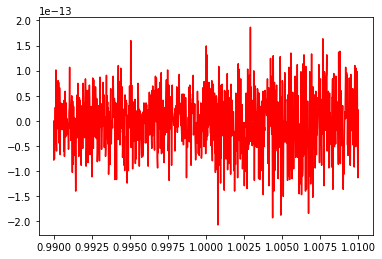

In [16]:
plot.plot(domain, res_bin, 'r-')
plot.show()

### abs error = 2.0

In [17]:
## b) (x-1)^19

domain = np.linspace(0.99, 1.01, 1001)
res_bin = []
res_ = []

for x in domain:
    res_bin.append(binomial(x,n=19))
    res_.append(eval_(x))

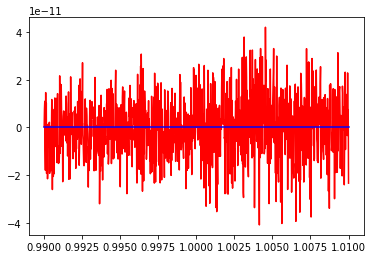

In [18]:
plot.plot(domain, res_bin, 'r-', domain, res_, 'b-')
plot.show()

### abs error = 4.0

-----